# Assignment 1 -BDAT1007
## Name&Id: Mahmoud Mraisi - 200510888

In [76]:
import pandas as pd
from sklearn.metrics.pairwise import nan_euclidean_distances
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [77]:
data=pd.read_csv("data.csv", sep=',')
data.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,North
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,North
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,East
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,North
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,West


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     112 non-null    int64  
 1   maxO3          96 non-null     float64
 2   T9             75 non-null     float64
 3   T12            79 non-null     float64
 4   T15            75 non-null     float64
 5   Ne9            78 non-null     float64
 6   Ne12           70 non-null     float64
 7   Ne15           80 non-null     float64
 8   Vx9            94 non-null     float64
 9   Vx12           102 non-null    float64
 10  Vx15           91 non-null     float64
 11  maxO3v         100 non-null    float64
 12  WindDirection  112 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 11.5+ KB


In [79]:
data.isnull().sum(axis = 0) ## counting the null values in the dataset

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

In [80]:
data = data.drop(['WindDirection', 'Unnamed: 0'], axis=1) ## droping columns with no numaric values in, and un needed columns
data.reset_index() ## reseting the index of the data
data

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0
1,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0
4,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0
108,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0
109,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN
110,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0


In [81]:
## the following function will be used to impute and plot the data afterwords 

def similarity_fun(data, col_name):
    print("The following for feature: " + col_name + "\n")
    df_no_null = data.dropna(subset=[col_name]) ## data wihtout Nans
    df_null = data[data[col_name].isna()] ## data with Nans
    sim_arr = nan_euclidean_distances(df_null, df_no_null) ## the similarity algorathim
    lst = []
    for i,n in enumerate(sim_arr):
        most_sim_val_index = np.argmin(sim_arr[i], axis=0) ## taking the most similar value
        lst.append(df_no_null[col_name].iloc[most_sim_val_index])
    df_null[col_name] = lst ## imputing the nan data with the most similar values from the data that has no Nans
    print("Nan values after imputation is done for column: "+ col_name +"\n")
    display(df_null)
    
    plt.plot(df_no_null[col_name],label='no_Nan')
    plt.plot(df_null[col_name], label='with_Nan')
    plt.ylabel("number of records")
    plt.legend()
    plt.title("feature: " + col_name)
    plt.show()


## looping each feature and applying the simalirity  function to it, please check each one below

The following for feature: maxO3

Nan values after imputation is done for column: maxO3



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
16,75.0,21.0,24.6,26.9,NaN,NaN,1.0,-0.3420,NaN,-0.6840,121.0
17,84.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
24,63.0,NaN,NaN,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
31,99.0,16.8,18.2,22.0,8.0,8.0,6.0,0.0000,0.0000,1.2856,79.0
32,99.0,20.8,NaN,NaN,NaN,3.0,4.0,0.0000,1.7101,NaN,93.0
41,76.0,16.9,19.1,NaN,5.0,NaN,6.0,-2.2981,-3.7588,0.0000,67.0
44,72.0,NaN,15.6,NaN,NaN,8.0,NaN,NaN,-3.8302,-4.3301,63.0
50,83.0,19.0,22.5,24.1,NaN,NaN,NaN,NaN,-1.0261,0.5209,81.0
62,59.0,18.6,18.7,17.8,8.0,8.0,8.0,-4.6985,-2.5000,-0.8682,63.0
80,160.0,20.1,22.9,27.6,8.0,8.0,6.0,1.2856,-1.7321,-0.6840,NaN


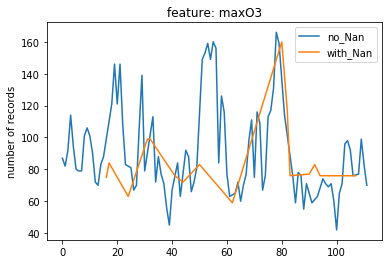

The following for feature: T9

Nan values after imputation is done for column: T9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
1,82.0,19.7,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
4,94.0,16.9,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
12,72.0,18.0,NaN,NaN,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
15,88.0,15.6,19.1,NaN,6.0,5.0,4.0,0.5209,-2.9544,-1.0261,83.0
17,NaN,17.4,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,21.0,NaN,NaN,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
24,NaN,18.7,NaN,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,19.7,NaN,NaN,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0
26,67.0,19.0,23.4,23.7,NaN,NaN,NaN,-1.5321,-3.0642,-0.8682,81.0
27,70.0,15.4,NaN,NaN,5.0,2.0,1.0,0.6840,0.0000,1.3681,67.0


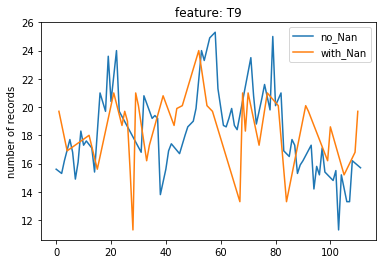

The following for feature: T12

Nan values after imputation is done for column: T12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
1,82.0,NaN,22.9,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
9,106.0,18.3,22.9,22.9,5.0,NaN,NaN,1.2856,-2.2981,-3.9392,101.0
12,72.0,NaN,20.7,NaN,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
14,83.0,15.4,19.1,16.6,8.0,7.0,NaN,-4.3301,-2.0521,-3.0000,70.0
17,NaN,NaN,20.4,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,NaN,24.6,NaN,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
24,NaN,NaN,20.6,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,NaN,22.9,NaN,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0
27,70.0,NaN,19.1,NaN,5.0,2.0,1.0,0.6840,0.0000,1.3681,67.0
28,106.0,NaN,18.9,NaN,NaN,0.0,1.0,2.8191,3.9392,3.4641,70.0


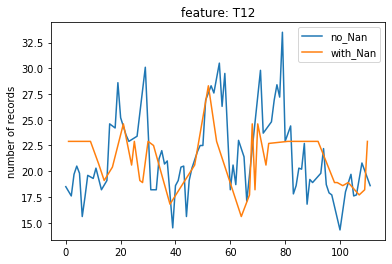

The following for feature: T15

Nan values after imputation is done for column: T15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,87.0,15.6,18.5,19.5,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0
1,82.0,NaN,NaN,24.8,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
3,114.0,16.2,19.7,22.7,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0
12,72.0,NaN,NaN,22.5,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
15,88.0,NaN,19.1,27.6,6.0,5.0,4.0,0.5209,-2.9544,-1.0261,83.0
17,NaN,NaN,NaN,26.5,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,NaN,NaN,26.9,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
22,108.0,24.0,23.5,27.6,4.0,4.0,0.0,-2.5712,-3.8567,-4.6985,146.0
24,NaN,NaN,NaN,20.3,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,NaN,NaN,24.8,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0


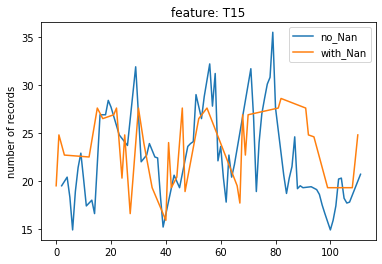

The following for feature: Ne9

Nan values after imputation is done for column: Ne9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
4,94.0,NaN,20.5,20.4,1.0,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
11,90.0,17.6,20.3,17.4,1.0,6.0,8.0,NaN,-1.0419,-0.6946,101.0
13,70.0,17.1,18.2,18.0,6.0,7.0,NaN,NaN,-7.8785,-5.1962,72.0
16,NaN,21.0,24.6,26.9,8.0,NaN,1.0,-0.3420,NaN,-0.6840,121.0
17,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,8.0,NaN,NaN,1.0000,-1.9284,-1.2155,121.0
21,146.0,NaN,NaN,NaN,1.0,0.0,0.0,2.9544,6.5778,NaN,121.0
23,83.0,19.7,22.9,24.8,6.0,NaN,NaN,-2.5981,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,6.0,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
26,67.0,NaN,23.4,23.7,8.0,NaN,NaN,-1.5321,-3.0642,-0.8682,81.0


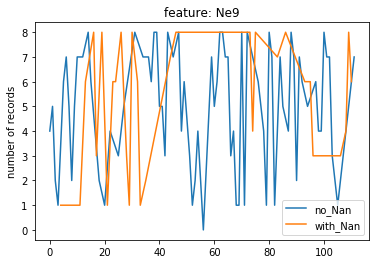

The following for feature: Ne12

Nan values after imputation is done for column: Ne12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,4.0,NaN,2.9544,NaN,0.5209,82.0
4,94.0,NaN,20.5,20.4,NaN,1.0,NaN,-0.5000,-2.9544,-4.3301,114.0
5,80.0,17.7,19.8,18.3,6.0,5.0,7.0,-5.6382,-5.0000,-6.0000,94.0
8,101.0,16.1,19.6,21.4,2.0,5.0,4.0,-0.7660,-1.0261,-2.2981,79.0
9,106.0,18.3,NaN,22.9,5.0,8.0,NaN,1.2856,-2.2981,-3.9392,101.0
16,NaN,21.0,24.6,26.9,NaN,7.0,1.0,-0.3420,NaN,-0.6840,121.0
17,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,NaN,8.0,NaN,1.0000,-1.9284,-1.2155,121.0
23,83.0,19.7,22.9,24.8,NaN,5.0,NaN,-2.5981,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,8.0,NaN,-5.6382,-3.8302,-4.5963,83.0


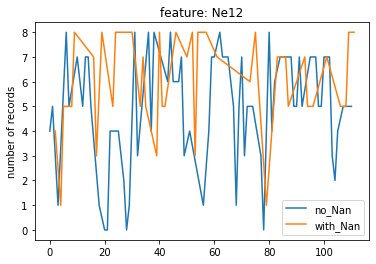

The following for feature: Ne15

Nan values after imputation is done for column: Ne15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,NaN,8.0,2.9544,NaN,0.5209,82.0
4,94.0,NaN,20.5,20.4,NaN,NaN,7.0,-0.5000,-2.9544,-4.3301,114.0
6,79.0,16.8,15.6,14.9,7.0,8.0,1.0,-4.3301,-1.8794,-3.7588,80.0
7,79.0,14.9,17.5,18.9,5.0,5.0,7.0,0.0000,-1.0419,-1.3892,99.0
9,106.0,18.3,NaN,22.9,5.0,NaN,6.0,1.2856,-2.2981,-3.9392,101.0
13,70.0,17.1,18.2,18.0,NaN,7.0,8.0,NaN,-7.8785,-5.1962,72.0
14,83.0,15.4,NaN,16.6,8.0,7.0,6.0,-4.3301,-2.0521,-3.0000,70.0
17,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,NaN,NaN,1.0,1.0000,-1.9284,-1.2155,121.0
23,83.0,19.7,22.9,24.8,NaN,NaN,3.0,-2.5981,NaN,NaN,NaN


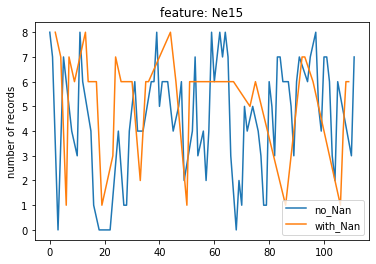

The following for feature: Vx9

Nan values after imputation is done for column: Vx9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,0.0000,0.3473,-0.1736,92.0
11,90.0,17.6,20.3,17.4,NaN,6.0,8.0,0.0000,-1.0419,-0.6946,101.0
13,70.0,17.1,18.2,18.0,NaN,7.0,NaN,-5.1962,-7.8785,-5.1962,72.0
18,121.0,19.7,24.2,26.9,2.0,1.0,0.0,1.8794,NaN,2.0000,81.0
20,121.0,20.4,25.2,27.7,1.0,0.0,0.0,0.0000,-0.5209,1.0261,146.0
36,77.0,19.4,20.7,22.5,7.0,8.0,NaN,-0.8682,-5.6382,-9.0000,88.0
44,NaN,NaN,15.6,NaN,NaN,8.0,NaN,-3.0000,-3.8302,-4.3301,63.0
46,88.0,NaN,20.3,NaN,NaN,NaN,NaN,1.2856,-3.4641,NaN,92.0
48,72.0,18.6,21.9,23.6,4.0,7.0,6.0,-2.2981,-1.9696,NaN,66.0
50,NaN,19.0,22.5,24.1,NaN,NaN,NaN,-2.5981,-1.0261,0.5209,81.0


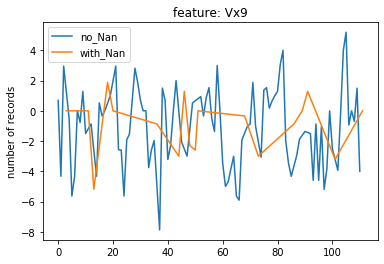

The following for feature: Vx12

Nan values after imputation is done for column: Vx12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,-1.7101,0.5209,82.0
16,NaN,21.0,24.6,26.9,NaN,NaN,1.0,-0.3420,0.0000,-0.6840,121.0
18,121.0,19.7,24.2,26.9,2.0,1.0,0.0,NaN,-1.0261,2.0000,81.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,-1.0261,NaN,NaN
40,67.0,15.6,18.6,NaN,5.0,NaN,5.0,-3.2139,-6.0622,NaN,45.0
42,84.0,17.4,20.4,NaN,3.0,NaN,6.0,0.0000,0.3473,-2.5981,67.0
55,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5321,-1.7321,NaN,149.0
57,84.0,NaN,26.3,27.8,NaN,NaN,2.0,-1.3681,0.3473,0.0000,156.0
88,55.0,15.3,16.8,19.2,8.0,7.0,5.0,-1.8794,0.3473,-2.3941,76.0
89,71.0,15.9,19.2,19.5,7.0,5.0,3.0,NaN,0.3473,-1.3892,55.0


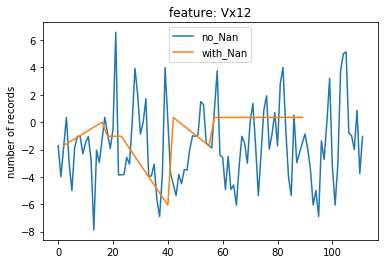

The following for feature: Vx15

Nan values after imputation is done for column: Vx15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
21,146.0,NaN,NaN,NaN,NaN,0.0,0.0,2.9544,6.5778,-0.6840,121.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,NaN,0.5209,NaN
32,NaN,20.8,NaN,NaN,NaN,3.0,4.0,0.0000,1.7101,-2.5712,93.0
39,45.0,NaN,14.5,15.2,8.0,NaN,8.0,0.6840,4.0000,-2.5712,NaN
40,67.0,15.6,18.6,NaN,5.0,NaN,5.0,-3.2139,NaN,-5.1962,45.0
46,88.0,NaN,20.3,NaN,NaN,NaN,NaN,NaN,-3.4641,-0.6840,92.0
47,66.0,18.0,NaN,NaN,8.0,6.0,5.0,-3.0000,-3.5000,-2.5000,88.0
48,72.0,18.6,21.9,23.6,4.0,7.0,6.0,NaN,-1.9696,0.0000,66.0
52,153.0,NaN,NaN,NaN,1.0,NaN,4.0,0.9397,1.5000,-2.5712,149.0
55,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5321,NaN,-0.6840,149.0


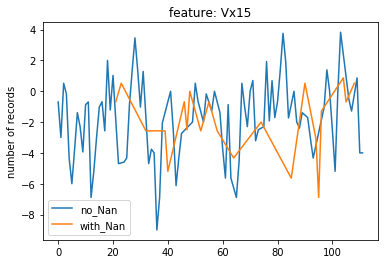

The following for feature: maxO3v

Nan values after imputation is done for column: maxO3v



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,67.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,NaN,NaN,81.0
39,45.0,NaN,14.5,15.2,8.0,NaN,8.0,0.6840,4.0000,NaN,93.0
49,81.0,18.8,22.5,23.9,6.0,3.0,2.0,0.5209,-1.0000,-2.0000,139.0
53,159.0,24.0,28.3,26.5,2.0,NaN,7.0,-0.3420,1.2856,-2.0000,149.0
61,63.0,18.7,20.6,20.3,6.0,NaN,7.0,-5.0000,-4.9240,-5.6382,83.0
68,98.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,-1.5321,-1.0000,121.0
70,75.0,NaN,NaN,NaN,8.0,7.0,1.0,-0.8660,0.0000,0.0000,121.0
80,NaN,20.1,22.9,27.6,8.0,8.0,6.0,1.2856,-1.7321,-0.6840,149.0
87,76.0,17.3,22.7,24.6,4.0,NaN,6.0,-2.9544,-2.9544,-2.0000,67.0


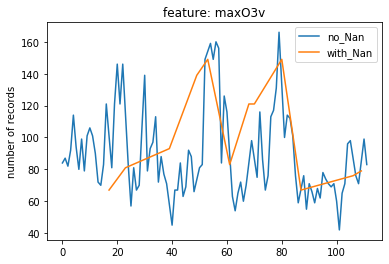

In [82]:
for col in data.columns:
    similarity_fun(data, col)
    


The following for feature: maxO3

Nan values after imputation is done for column: maxO3



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
16,75.0,21.0,24.6,26.9,NaN,NaN,1.0,-0.3420,NaN,-0.6840,121.0
17,84.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
24,63.0,NaN,NaN,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
31,99.0,16.8,18.2,22.0,8.0,8.0,6.0,0.0000,0.0000,1.2856,79.0
32,99.0,20.8,NaN,NaN,NaN,3.0,4.0,0.0000,1.7101,NaN,93.0
41,76.0,16.9,19.1,NaN,5.0,NaN,6.0,-2.2981,-3.7588,0.0000,67.0
44,72.0,NaN,15.6,NaN,NaN,8.0,NaN,NaN,-3.8302,-4.3301,63.0
50,83.0,19.0,22.5,24.1,NaN,NaN,NaN,NaN,-1.0261,0.5209,81.0
62,59.0,18.6,18.7,17.8,8.0,8.0,8.0,-4.6985,-2.5000,-0.8682,63.0
80,160.0,20.1,22.9,27.6,8.0,8.0,6.0,1.2856,-1.7321,-0.6840,NaN


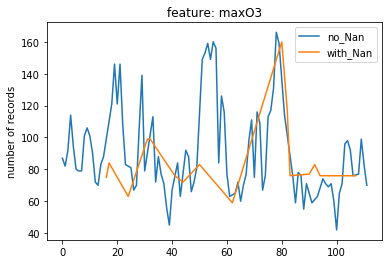

In [83]:
similarity_fun(data, "maxO3")

The following for feature: T9

Nan values after imputation is done for column: T9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
1,82.0,19.7,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
4,94.0,16.9,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
12,72.0,18.0,NaN,NaN,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
15,88.0,15.6,19.1,NaN,6.0,5.0,4.0,0.5209,-2.9544,-1.0261,83.0
17,NaN,17.4,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,21.0,NaN,NaN,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
24,NaN,18.7,NaN,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,19.7,NaN,NaN,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0
26,67.0,19.0,23.4,23.7,NaN,NaN,NaN,-1.5321,-3.0642,-0.8682,81.0
27,70.0,15.4,NaN,NaN,5.0,2.0,1.0,0.6840,0.0000,1.3681,67.0


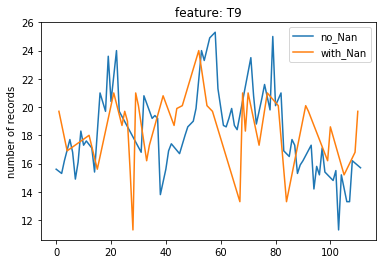

In [84]:
similarity_fun(data, "T9")

The following for feature: T12

Nan values after imputation is done for column: T12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
1,82.0,NaN,22.9,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
9,106.0,18.3,22.9,22.9,5.0,NaN,NaN,1.2856,-2.2981,-3.9392,101.0
12,72.0,NaN,20.7,NaN,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
14,83.0,15.4,19.1,16.6,8.0,7.0,NaN,-4.3301,-2.0521,-3.0000,70.0
17,NaN,NaN,20.4,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,NaN,24.6,NaN,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
24,NaN,NaN,20.6,NaN,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,NaN,22.9,NaN,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0
27,70.0,NaN,19.1,NaN,5.0,2.0,1.0,0.6840,0.0000,1.3681,67.0
28,106.0,NaN,18.9,NaN,NaN,0.0,1.0,2.8191,3.9392,3.4641,70.0


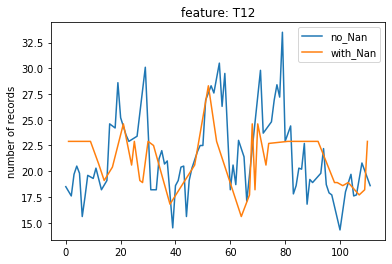

In [85]:
similarity_fun(data, "T12")

The following for feature: T15

Nan values after imputation is done for column: T15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,87.0,15.6,18.5,19.5,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0
1,82.0,NaN,NaN,24.8,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
3,114.0,16.2,19.7,22.7,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0
12,72.0,NaN,NaN,22.5,7.0,5.0,6.0,-0.8682,-2.7362,-6.8944,90.0
15,88.0,NaN,19.1,27.6,6.0,5.0,4.0,0.5209,-2.9544,-1.0261,83.0
17,NaN,NaN,NaN,26.5,NaN,NaN,NaN,0.0000,0.3473,-2.5712,NaN
21,146.0,NaN,NaN,26.9,NaN,0.0,0.0,2.9544,6.5778,NaN,121.0
22,108.0,24.0,23.5,27.6,4.0,4.0,0.0,-2.5712,-3.8567,-4.6985,146.0
24,NaN,NaN,NaN,20.3,NaN,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
25,81.0,NaN,NaN,24.8,3.0,4.0,4.0,-1.9284,-2.5712,-4.3301,57.0


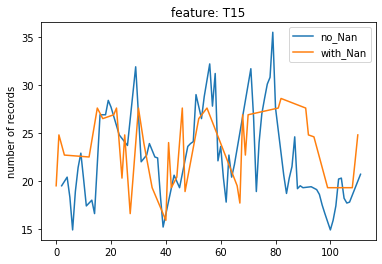

In [86]:
similarity_fun(data, "T15")

The following for feature: Ne9

Nan values after imputation is done for column: Ne9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
4,94.0,NaN,20.5,20.4,1.0,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
11,90.0,17.6,20.3,17.4,1.0,6.0,8.0,NaN,-1.0419,-0.6946,101.0
13,70.0,17.1,18.2,18.0,6.0,7.0,NaN,NaN,-7.8785,-5.1962,72.0
16,NaN,21.0,24.6,26.9,8.0,NaN,1.0,-0.3420,NaN,-0.6840,121.0
17,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,8.0,NaN,NaN,1.0000,-1.9284,-1.2155,121.0
21,146.0,NaN,NaN,NaN,1.0,0.0,0.0,2.9544,6.5778,NaN,121.0
23,83.0,19.7,22.9,24.8,6.0,NaN,NaN,-2.5981,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,6.0,NaN,NaN,-5.6382,-3.8302,-4.5963,83.0
26,67.0,NaN,23.4,23.7,8.0,NaN,NaN,-1.5321,-3.0642,-0.8682,81.0


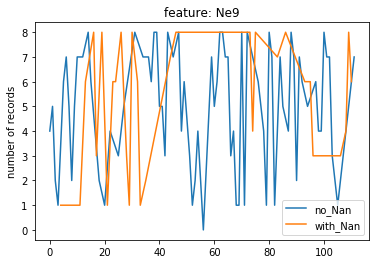

In [87]:
similarity_fun(data, "Ne9")

The following for feature: Ne12

Nan values after imputation is done for column: Ne12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,4.0,NaN,2.9544,NaN,0.5209,82.0
4,94.0,NaN,20.5,20.4,NaN,1.0,NaN,-0.5000,-2.9544,-4.3301,114.0
5,80.0,17.7,19.8,18.3,6.0,5.0,7.0,-5.6382,-5.0000,-6.0000,94.0
8,101.0,16.1,19.6,21.4,2.0,5.0,4.0,-0.7660,-1.0261,-2.2981,79.0
9,106.0,18.3,NaN,22.9,5.0,8.0,NaN,1.2856,-2.2981,-3.9392,101.0
16,NaN,21.0,24.6,26.9,NaN,7.0,1.0,-0.3420,NaN,-0.6840,121.0
17,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,NaN,8.0,NaN,1.0000,-1.9284,-1.2155,121.0
23,83.0,19.7,22.9,24.8,NaN,5.0,NaN,-2.5981,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,8.0,NaN,-5.6382,-3.8302,-4.5963,83.0


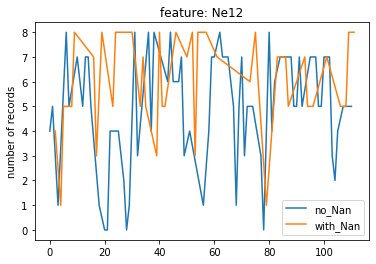

In [88]:
similarity_fun(data, "Ne12")

The following for feature: Ne15

Nan values after imputation is done for column: Ne15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,NaN,8.0,2.9544,NaN,0.5209,82.0
4,94.0,NaN,20.5,20.4,NaN,NaN,7.0,-0.5000,-2.9544,-4.3301,114.0
6,79.0,16.8,15.6,14.9,7.0,8.0,1.0,-4.3301,-1.8794,-3.7588,80.0
7,79.0,14.9,17.5,18.9,5.0,5.0,7.0,0.0000,-1.0419,-1.3892,99.0
9,106.0,18.3,NaN,22.9,5.0,NaN,6.0,1.2856,-2.2981,-3.9392,101.0
13,70.0,17.1,18.2,18.0,NaN,7.0,8.0,NaN,-7.8785,-5.1962,72.0
14,83.0,15.4,NaN,16.6,8.0,7.0,6.0,-4.3301,-2.0521,-3.0000,70.0
17,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0000,0.3473,-2.5712,NaN
19,146.0,23.6,28.6,28.4,NaN,NaN,1.0,1.0000,-1.9284,-1.2155,121.0
23,83.0,19.7,22.9,24.8,NaN,NaN,3.0,-2.5981,NaN,NaN,NaN


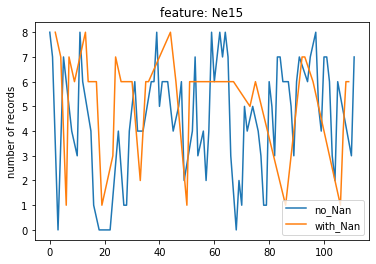

In [89]:
similarity_fun(data, "Ne15")

The following for feature: Vx9

Nan values after imputation is done for column: Vx9



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,0.0000,0.3473,-0.1736,92.0
11,90.0,17.6,20.3,17.4,NaN,6.0,8.0,0.0000,-1.0419,-0.6946,101.0
13,70.0,17.1,18.2,18.0,NaN,7.0,NaN,-5.1962,-7.8785,-5.1962,72.0
18,121.0,19.7,24.2,26.9,2.0,1.0,0.0,1.8794,NaN,2.0000,81.0
20,121.0,20.4,25.2,27.7,1.0,0.0,0.0,0.0000,-0.5209,1.0261,146.0
36,77.0,19.4,20.7,22.5,7.0,8.0,NaN,-0.8682,-5.6382,-9.0000,88.0
44,NaN,NaN,15.6,NaN,NaN,8.0,NaN,-3.0000,-3.8302,-4.3301,63.0
46,88.0,NaN,20.3,NaN,NaN,NaN,NaN,1.2856,-3.4641,NaN,92.0
48,72.0,18.6,21.9,23.6,4.0,7.0,6.0,-2.2981,-1.9696,NaN,66.0
50,NaN,19.0,22.5,24.1,NaN,NaN,NaN,-2.5981,-1.0261,0.5209,81.0


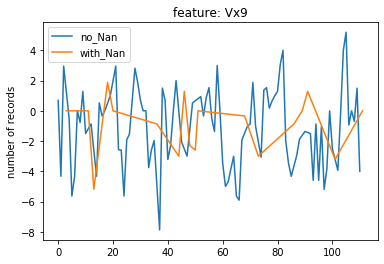

In [90]:
similarity_fun(data, "Vx9")

The following for feature: Vx12

Nan values after imputation is done for column: Vx12



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,-1.7101,0.5209,82.0
16,NaN,21.0,24.6,26.9,NaN,NaN,1.0,-0.3420,0.0000,-0.6840,121.0
18,121.0,19.7,24.2,26.9,2.0,1.0,0.0,NaN,-1.0261,2.0000,81.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,-1.0261,NaN,NaN
40,67.0,15.6,18.6,NaN,5.0,NaN,5.0,-3.2139,-6.0622,NaN,45.0
42,84.0,17.4,20.4,NaN,3.0,NaN,6.0,0.0000,0.3473,-2.5981,67.0
55,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5321,-1.7321,NaN,149.0
57,84.0,NaN,26.3,27.8,NaN,NaN,2.0,-1.3681,0.3473,0.0000,156.0
88,55.0,15.3,16.8,19.2,8.0,7.0,5.0,-1.8794,0.3473,-2.3941,76.0
89,71.0,15.9,19.2,19.5,7.0,5.0,3.0,NaN,0.3473,-1.3892,55.0


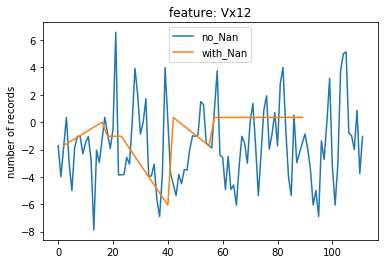

In [91]:
similarity_fun(data, "Vx12")

The following for feature: Vx15

Nan values after imputation is done for column: Vx15



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
21,146.0,NaN,NaN,NaN,NaN,0.0,0.0,2.9544,6.5778,-0.6840,121.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,NaN,0.5209,NaN
32,NaN,20.8,NaN,NaN,NaN,3.0,4.0,0.0000,1.7101,-2.5712,93.0
39,45.0,NaN,14.5,15.2,8.0,NaN,8.0,0.6840,4.0000,-2.5712,NaN
40,67.0,15.6,18.6,NaN,5.0,NaN,5.0,-3.2139,NaN,-5.1962,45.0
46,88.0,NaN,20.3,NaN,NaN,NaN,NaN,NaN,-3.4641,-0.6840,92.0
47,66.0,18.0,NaN,NaN,8.0,6.0,5.0,-3.0000,-3.5000,-2.5000,88.0
48,72.0,18.6,21.9,23.6,4.0,7.0,6.0,NaN,-1.9696,0.0000,66.0
52,153.0,NaN,NaN,NaN,1.0,NaN,4.0,0.9397,1.5000,-2.5712,149.0
55,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5321,NaN,-0.6840,149.0


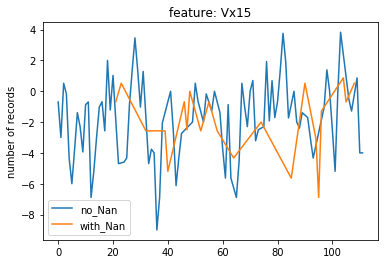

In [92]:
similarity_fun(data, "Vx15")

The following for feature: maxO3v

Nan values after imputation is done for column: maxO3v



,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.3473,-2.5712,67.0
23,83.0,19.7,22.9,24.8,NaN,NaN,NaN,-2.5981,NaN,NaN,81.0
39,45.0,NaN,14.5,15.2,8.0,NaN,8.0,0.6840,4.0000,NaN,93.0
49,81.0,18.8,22.5,23.9,6.0,3.0,2.0,0.5209,-1.0000,-2.0000,139.0
53,159.0,24.0,28.3,26.5,2.0,NaN,7.0,-0.3420,1.2856,-2.0000,149.0
61,63.0,18.7,20.6,20.3,6.0,NaN,7.0,-5.0000,-4.9240,-5.6382,83.0
68,98.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,-1.5321,-1.0000,121.0
70,75.0,NaN,NaN,NaN,8.0,7.0,1.0,-0.8660,0.0000,0.0000,121.0
80,NaN,20.1,22.9,27.6,8.0,8.0,6.0,1.2856,-1.7321,-0.6840,149.0
87,76.0,17.3,22.7,24.6,4.0,NaN,6.0,-2.9544,-2.9544,-2.0000,67.0


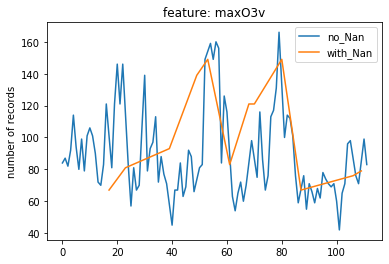

In [93]:
similarity_fun(data, "maxO3v")